Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu


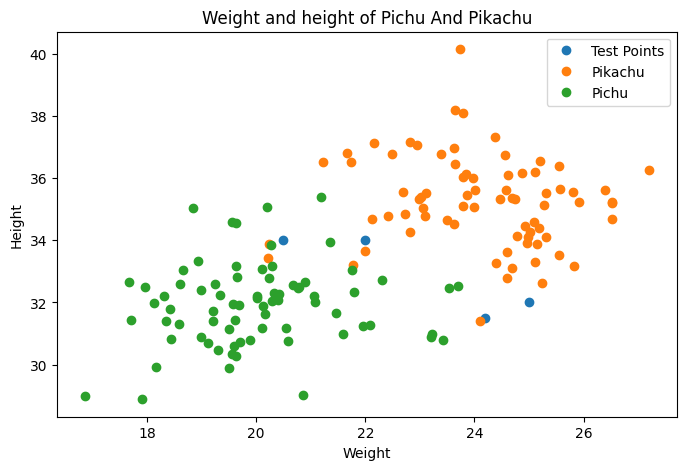

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Här skapar jag en Pokemon Data som en Tuple där jag sedan med koden under kommer spara in all information som namnen Pichu och Pickachu, Vad deras längd Data är och Bredd Data, 
Pokemon_Data = []

with open (r"C:\Code\Data\datapoints.txt", "r") as Datapoints:
    for Data in Datapoints:
        #Tar bort all onödiga bokstäver från texten som (" ", ",")
        Tal = Data.strip().split(',')
        if len(Tal) == 3:
            width = float(Tal[0])
            height = float(Tal[1])
            Pokemon = int(Tal[2])
            Pokemon_Data.append((width, height, Pokemon)) #sparar in mina test punkter in i min tuple [test_points] 

#Här sparar jag in rätt information till rätt klass bereonde på siffran de har i slutet filen Datapoints.txt
width_pichu = [w for w, h, l in Pokemon_Data if l == 0]
height_pichu = [h for w, h, l in Pokemon_Data if l == 0]

width_pikachu = [w for w, h, l in Pokemon_Data if l == 1]
height_pikachu = [h for w, h, l in Pokemon_Data if l == 1]

#Testpunkterna sparar jag in i en tuple Test_points[]
Test_points = [
    (25, 32),
    (24.2, 31.5),
    (22, 34),
    (20.5, 34)
]

# skapar en funktion för euclidean funktionen vilket kommer behövas för att räkan ut KNN
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, k): #Här ger jag talet som är grundstenen för att räkna ut hur många punkter den ska räkna för att se vad som räknas som KNN 
        self.k = k
    #skapar träningsdatan med en funktion som jag kallar för fit och ger datan namnen "X", "y"
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        #Koden räknar ut avståndet
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        #Koden hittar de närmsta punkterna
        k_indices = np.argsort(distances)[:self.k]  # Corrected to take the first k indices
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #Koden väljer den mest valda punkten 
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
X_train = [(w, h) for w, h, l in Pokemon_Data]
y_train = [l for w, h, l in Pokemon_Data]

knn = KNN(k=1) #Här initiera jag knn och ger den värdet 1 (den ska bara hitta en punkt vilket som ska vara den närmsta)
knn.fit(np.array(X_train), np.array(y_train))

predictions = knn.predict(np.array(Test_points))
#Här skriver koden ut resultatet på vad den fann som närmsta punkt
for test_point, prediction in zip(Test_points, predictions):
    pokemon_name = "Pichu" if prediction == 0 else "Pikachu"
    print(f"Sample with (width, height): {test_point} classified as {pokemon_name}")



plt.figure(figsize=(8,5), dpi =100)
plt.title("Weight and height of Pichu And Pikachu")
plt.xlabel("Weight")
plt.ylabel("Height")
test_x, test_y = zip(*Test_points)
plt.plot(test_x, test_y, "o", label='Test Points')
plt.plot(width_pikachu, height_pikachu, "o", label=("Pikachu"))
plt.plot(width_pichu, height_pichu, "o", label=("Pichu"))

plt.legend()

Sample with (width, height): (21.25, 34.0) classified as Pichu


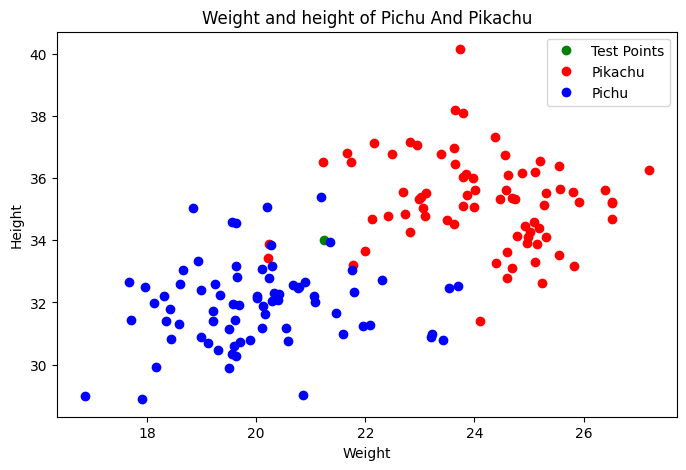

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# En tuple där vi sparar in pokemonens data som height, bredd och namn
Pokemon_Data = []

with open (r"C:\Code\Data\datapoints.txt", "r") as Datapoints:
    for Data in Datapoints:
        #Tar bort all onödiga bokstäver från texten som (" ", ",")
        Tal = Data.strip().split(',')
        if len(Tal) == 3:
            width = float(Tal[0])
            height = float(Tal[1])
            Pokemon = int(Tal[2])
            Pokemon_Data.append((width, height, Pokemon)) #sparar in informationen in i Pokemon Data tupeln

#Här sparar jag in rätt information till rätt klass bereonde på siffran de har i slutet filen Datapoints.txt
width_pichu = [w for w, h, l in Pokemon_Data if l == 0]
height_pichu = [h for w, h, l in Pokemon_Data if l == 0]

width_pikachu = [w for w, h, l in Pokemon_Data if l == 1]
height_pikachu = [h for w, h, l in Pokemon_Data if l == 1]

#Denna funktionen skapar jag en egen testpunkt
def test_point():
    test_points = []
    while True:
        Own_Testpoint = input("Enter a test point as 'width,height")
        try:
            width, height = map(float, Own_Testpoint.split(','))
            if width < 0 or height < 0:
                raise ValueError #Funktionen skapar ett fel meddelande ifall talen man skriver in är under 0, vilket innebär negativa tal
            test_points.append((width, height)) #sparar in mina test punkter in i min tuple [test_points] 
            break
        except ValueError:
            print("Try again, remember the widith and height need to have ',' inbetween and it has to only be positive numbers")
    return test_points

Test_points = test_point()

# skapar en funktion för euclidean funktionen vilket kommer behövas för att räkan ut KNN
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, k): #Här ger jag talet som är grundstenen för att räkna ut hur många punkter den ska räkna för att se vad som räknas som KNN 
        self.k = k
    #skapar träningsdatan med en funktion som jag kallar för fit och ger datan namnen "X", "y"
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        #Koden räknar ut avståndet
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Koden hittar de närmsta punkterna  
        k_indices = np.argsort(distances)[:self.k]  # Corrected to take the first k indices
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #Koden väljer den mest valda punkten 
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
X_train = [(w, h) for w, h, l  in Pokemon_Data]
y_train = [l for w, h, l in Pokemon_Data]

knn = KNN(1) #Här initiera jag knn och ger den värdet 1 (den ska bara hitta en punkt vilket som ska vara den närmsta)
knn.fit(np.array(X_train), np.array(y_train))

predictions = knn.predict(np.array(Test_points)) 

#Här skriver koden ut resultatet på vad den fann som närmsta punkt
for test_point, prediction in zip(Test_points, predictions):
    pokemon_name = "Pichu" if prediction == 0 else "Pikachu"
    print(f"Sample with (width, height): {test_point} classified as {pokemon_name}")
        



 
plt.figure(figsize=(8,5), dpi =100)
plt.title("Weight and height of Pichu And Pikachu")
plt.xlabel("Weight")
plt.ylabel("Height")
test_x, test_y = zip(*Test_points)
plt.plot(test_x, test_y, "o", color = "g", label='Test Points')
plt.plot(width_pikachu, height_pikachu, "o", color = "r", label=("Pikachu"))
plt.plot(width_pichu, height_pichu, "o", color = "b", label=("Pichu"))

plt.legend()

Sample with (width, height): (21.25, 34.0) classified as Pichu


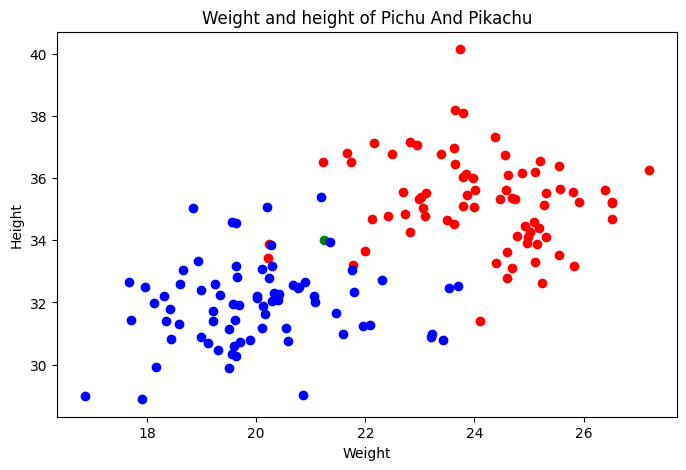

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# En tuple där vi sparar in pokemonens data som height, bredd och namn
Pokemon_Data = []

with open (r"C:\Code\Data\datapoints.txt", "r") as Datapoints:
    for Data in Datapoints:
        #Tar bort all onödiga bokstäver från texten som (" ", ",")
        Tal = Data.strip().split(',')
        if len(Tal) == 3:
            width = float(Tal[0])
            height = float(Tal[1])
            Pokemon = int(Tal[2])
            Pokemon_Data.append((width, height, Pokemon)) #sparar in informationen in i Pokemon Data tupeln

#Här sparar jag in rätt information till rätt klass bereonde på siffran de har i slutet filen Datapoints.txt
width_pichu = [w for w, h, l in Pokemon_Data if l == 0]
height_pichu = [h for w, h, l in Pokemon_Data if l == 0]

width_pikachu = [w for w, h, l in Pokemon_Data if l == 1]
height_pikachu = [h for w, h, l in Pokemon_Data if l == 1]

#Denna funktionen skapar jag en egen testpunkt
def test_point():
    test_points = []
    while True:
        Own_Testpoint = input("Enter a test point as 'width,height")
        try:
            width, height = map(float, Own_Testpoint.split(','))
            if width < 0 or height < 0:
                raise ValueError #Funktionen skapar ett fel meddelande ifall talen man skriver in är under 0, vilket innebär negativa tal
            test_points.append((width, height)) #sparar in mina test punkter in i min tuple [test_points] 
            break
        except ValueError:
            print("Try again, remember the widith and height need to have ',' inbetween and it has to only be positive numbers")
    return test_points

Test_points = test_point()

# skapar en funktion för euclidean funktionen vilket kommer behövas för att räkan ut KNN
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, k): #Här ger jag talet som är grundstenen för att räkna ut hur många punkter den ska räkna för att se vad som räknas som KNN 
        self.k = k
    #skapar träningsdatan med en funktion som jag kallar för fit och ger datan namnen "X", "y"
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        #Koden räknar ut avståndet
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Koden hittar de närmsta punkterna  
        k_indices = np.argsort(distances)[:self.k]  # Corrected to take the first k indices
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #Koden väljer den mest valda punkten 
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
X_train = [(w, h) for w, h, l  in Pokemon_Data]
y_train = [l for w, h, l in Pokemon_Data]

knn = KNN(10) #Här initiera jag knn och ger den värdet 10 (det innebär att KNN kommer då att kolla på de 10 närmsta punkterna istället och välja pokemonen som har majoriteten av alla punkter)
knn.fit(np.array(X_train), np.array(y_train))

predictions = knn.predict(np.array(Test_points)) 

#Här skriver koden ut resultatet på vad den fann som närmsta punkt
for test_point, prediction in zip(Test_points, predictions):
    pokemon_name = "Pichu" if prediction == 0 else "Pikachu"
    print(f"Sample with (width, height): {test_point} classified as {pokemon_name}")
        



 
plt.figure(figsize=(8,5), dpi =100)
plt.title("Weight and height of Pichu And Pikachu")
plt.xlabel("Weight")
plt.ylabel("Height")
test_x, test_y = zip(*Test_points)
plt.plot(test_x, test_y, "o", color = "g", label='Test Points')
plt.plot(width_pikachu, height_pikachu, "o", color = "r", label=("Pikachu"))
plt.plot(width_pichu, height_pichu, "o", color = "b", label=("Pichu"))